<a href="https://colab.research.google.com/github/rsundar80/data-science/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Welcome')

Welcome


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
weather_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Weather/Summary of Weather.csv",low_memory=False)

In [ ]:
#weather_df.head()

In [ ]:
weather_df.drop(['PRCP','SPD','SNF','MeanTemp','MEA','MIN','Date','PoorWeather','TSHDSBRSGF','YR','MO','DA','FT','FB','FTI','ITH','SD3','RHX','RHN','RVG','RVG','SND','WTE'],axis=1,inplace=True)

In [ ]:
#weather_df.info()

In [ ]:
weather_df['Precip'] = pd.to_numeric(weather_df['Precip'],errors='coerce')
weather_df['Snowfall'] = pd.to_numeric(weather_df['Snowfall'],errors='coerce')


In [ ]:
for col in weather_df.columns:
  weather_df[col]=weather_df[col].fillna(weather_df[col].median())

In [ ]:
y=weather_df['MaxTemp']
weather_df_base_data=weather_df.drop('MaxTemp',axis=1)

In [ ]:
weather_df_base_data.head()

,STA,Precip,WindGustSpd,MinTemp,Snowfall,DR,MAX,PGT
0,10001,1.016,37.04,22.222222,0.0,32.0,78.0,11.6
1,10001,0.000,37.04,21.666667,0.0,32.0,84.0,11.6
2,10001,2.540,37.04,22.222222,0.0,32.0,79.0,11.6
3,10001,2.540,37.04,22.222222,0.0,32.0,80.0,11.6
4,10001,0.000,37.04,21.666667,0.0,32.0,80.0,11.6


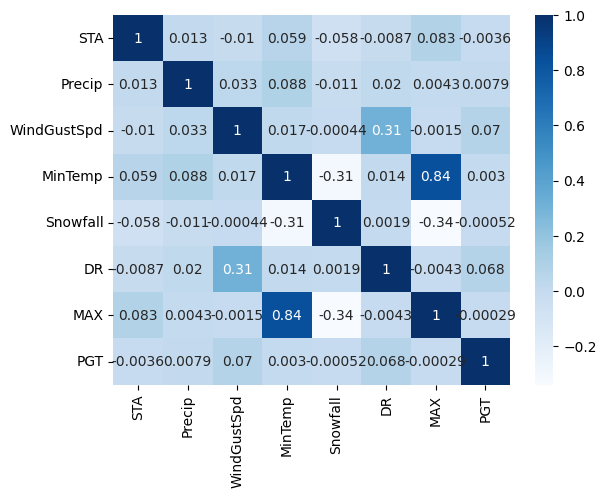

In [ ]:
#Heat Map Multi Colli chceck - Corelation check .. Need to avoid multi colli by using this step.
sns.heatmap(weather_df_base_data.corr(),annot=True,cmap="Blues")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
#Standard scaler
weather_df_standard_scale=StandardScaler().fit_transform(weather_df_base_data) #this will provide the data in array format
x= pd.DataFrame(weather_df_standard_scale,columns=weather_df_base_data.columns)  #this will convert the array into DF

In [ ]:
weather_df_base_data.skew()

,0
STA,1.288166
Precip,7.206004
WindGustSpd,16.109900
MinTemp,-1.889984
Snowfall,16.538740
DR,-8.586806
MAX,-1.887753
PGT,5.991119


In [ ]:
weather_df_base_data.kurt()

,0
STA,0.868481
Precip,83.560441
WindGustSpd,872.268227
MinTemp,4.517975
Snowfall,336.536272
DR,491.221222
MAX,5.350760
PGT,589.150202


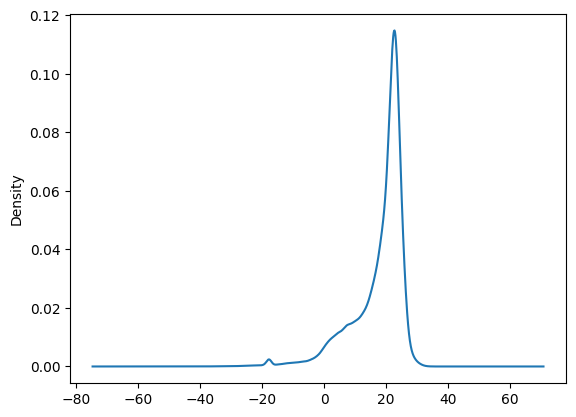

In [ ]:
weather_df_base_data['MinTemp'].plot(kind="density")
plt.show()

In [ ]:
#Min Max scaler
#weather_df_minmax=MinMaxScaler().fit_transform(weather_df)
#x=pd.DataFrame(weather_df_minmax,columns=weather_df.columns)
#for this R Square value is coming as 1. hence ignoring as R Square value should be between 0.60 to 0.95

In [ ]:
x.head()

,STA,Precip,WindGustSpd,MinTemp,Snowfall,DR,MAX,PGT
0,-0.93821,-0.204575,-0.004761,0.531849,-0.093005,0.020911,-0.203456,-0.005609
1,-0.93821,-0.298640,-0.004761,0.465192,-0.093005,0.020911,0.200807,-0.005609
2,-0.93821,-0.063477,-0.004761,0.531849,-0.093005,0.020911,-0.136079,-0.005609
3,-0.93821,-0.063477,-0.004761,0.531849,-0.093005,0.020911,-0.068702,-0.005609
4,-0.93821,-0.298640,-0.004761,0.465192,-0.093005,0.020911,-0.068702,-0.005609


In [ ]:
regmodel=LinearRegression().fit(x,y)

In [ ]:
regmodel.score(x,y) # R Square

0.9125531511519304

In [ ]:
regmodel_pred=regmodel.predict(x)

In [ ]:
np.sqrt(np.mean(np.square(y-regmodel_pred))) #RMSE

2.577970769420327

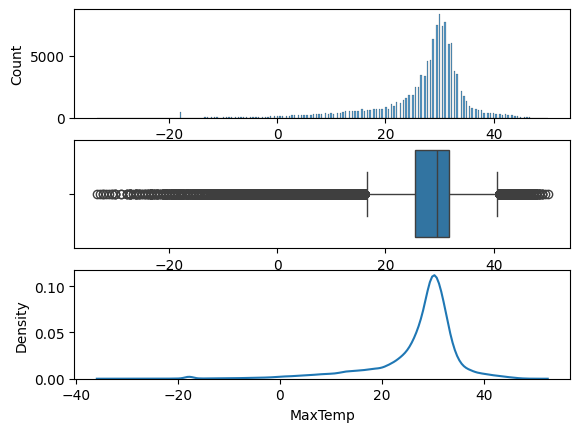

In [ ]:
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,ax=ax[1],orient="h")
sns.kdeplot(y,ax=ax[2])
plt.show()

In [ ]:
negative_values = weather_df[weather_df['MaxTemp'] < -1]  # Replace 'MaxTemp' if necessary


In [ ]:
#print(negative_values)

In [ ]:
#fig,ax=plt.subplots(3,1)
#sns.histplot(np.sqrt(y),ax=ax[0])
#sns.boxplot(np.sqrt(y),ax=ax[1],orient="h")
#sns.kdeplot(np.sqrt(y),ax=ax[2])
#plt.show()

In [ ]:
#Build Module with Logarthmic Transformation of y
# Replace 0 and negative values with a small positive value
# to avoid issues with the log transformation
y_transformed = y.copy()  # Create a copy of y to avoid modifying the original
y_transformed[y_transformed <= 0] = 1e-6  # Replace values <= 0 with 1e-6

regmodel_final_log = LinearRegression().fit(x, np.log(y_transformed))


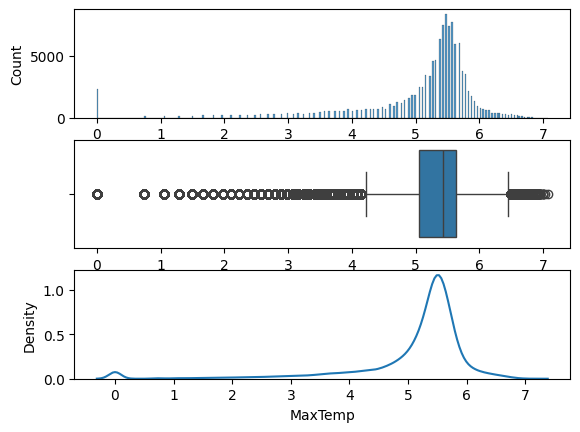

In [ ]:
fig,ax=plt.subplots(3,1)
sns.histplot(np.sqrt(y_transformed),ax=ax[0])
sns.boxplot(np.sqrt(y_transformed),ax=ax[1],orient="h")
sns.kdeplot(np.sqrt(y_transformed),ax=ax[2])
plt.show()

In [ ]:
regmodel_final_log.score(x,np.log(y_transformed)) # R Square #Rejected as value is less than 0.60

0.48657342329522335